In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam_mail_detection.csv', encoding = 'latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3104,ham,Or remind me in a few hrs.,NaN,NaN,NaN
3602,ham,"I'm not sure, I was just checking out what was...",NaN,NaN,NaN
4324,ham,Am only searching for good dual sim mobile pa.,NaN,NaN,NaN
31,ham,Yeah he got in at 2 and was v apologetic. n ha...,NaN,NaN,NaN
1667,ham,So now my dad is gonna call after he gets out ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#since last three columns have many null values, those columns are not useful and hence they are dropped
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [7]:
#rename the other cols
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.sample(5)

,target,text
535,ham,"Good afternoon, my love! How goes that day ? I..."
1756,ham,Lmao ok I wont be needing u to do my hair anym...
2088,spam,Well done ENGLAND! Get the official poly ringt...
3143,ham,"Haha I heard that, text me when you're around"
1283,ham,Yes i thought so. Thanks.


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
#All ham values are changed to 1, and all spam values are changed to 1 by using labelencoder
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.sample(5)

,target,text
2907,0,Why must we sit around and wait for summer day...
1316,0,Why nothing. Ok anyway give me treat
2060,0,I did. One slice and one breadstick. Lol
4566,0,But you were together so you should be thinkin...
4506,0,He neva grumble but i sad lor... Hee... Buy tm...


In [11]:
#checking for null values in the samples
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [13]:
#shape of data after dropping the duplicate values
df.shape

(5169, 2)

In [14]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

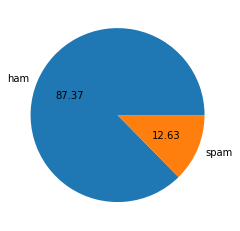

In [15]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [16]:
import nltk

In [17]:
#create another column that stores the number of characters in each mail
df['num_chars'] = df['text'].apply(len)

In [18]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
#create another column that stores the number of words in each mail, using tokenization which is available in nltk library
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
#create another column that stores the number of sentences in each mail
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
#Figure out the number of words, characters, and sentences in ham mail
df[df['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.958370,1.815545
std,56.358207,13.395014,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [24]:
#Figure out the number of words, characters, and sentences in spam mail
df[df['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [25]:
import seaborn as sns

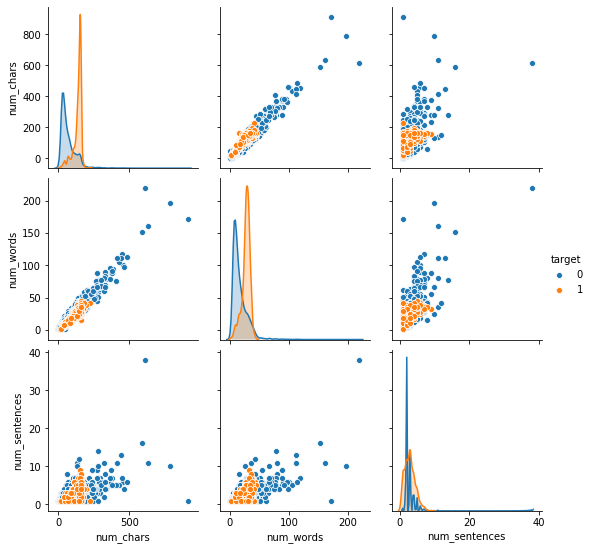

In [26]:
#Find the relations between number of words, chars and sentences
sns.pairplot(df, hue = 'target')

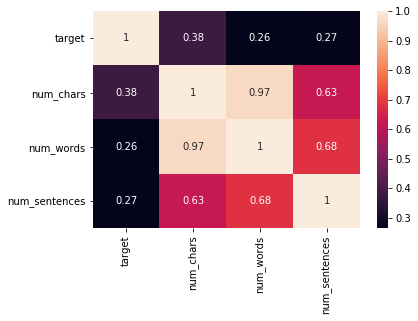

In [27]:
sns.heatmap(df.corr(), annot = True)

In [28]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [29]:
#create a function that converts the text into all lowercase, tokenize it and then remove all the stopwords
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [30]:
#create a new column and store the transformed text in that
df['transformed_text'] = df['text'].apply(transform_text)

In [31]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
#append every word of ham and spam mail in their respective lists
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)        

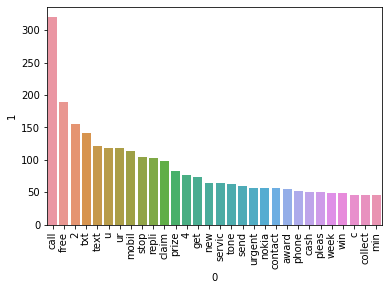

In [33]:
#plot a bar graph of the most repeating words in spam mail
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

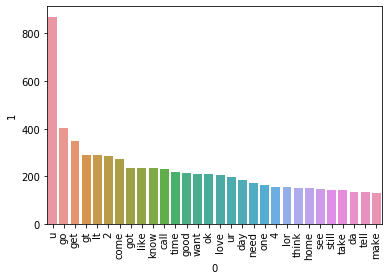

In [34]:
#plot a bar graph of the most repeating words in am mail
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [35]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
#import the necessary libraries to build the model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [37]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [38]:
X.shape

(5169, 3000)

In [39]:
y = df['target'].values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
#divide the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [42]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [43]:
algs = {'gnb' : GaussianNB(), 'mnb' : MultinomialNB(), 'bnb' : BernoulliNB(), 'lr' : LogisticRegression(solver='liblinear', penalty='l1'), 'knn' : KNeighborsClassifier(), 'svc' : SVC(kernel='sigmoid', gamma=1.0), 'RF' : RandomForestClassifier(n_estimators=50, random_state=2), 'DT' : DecisionTreeClassifier(max_depth=5)}

In [44]:
for k, v in algs.items():
    print(k)

gnb
mnb
bnb
lr
knn
svc
RF
DT


In [45]:
for k, v in algs.items():
    v.fit(X_train, y_train)
    y_pred = v.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    print(f' {k} :\naccuracy : {accuracy}\nprecision : {precision}')

 gnb :
accuracy : 0.867504835589942
precision : 0.5022421524663677
 mnb :
accuracy : 0.9729206963249516
precision : 1.0
 bnb :
accuracy : 0.9816247582205029
precision : 0.9917355371900827
 lr :
accuracy : 0.9574468085106383
precision : 0.9519230769230769
 knn :
accuracy : 0.9052224371373307
precision : 1.0
 svc :
accuracy : 0.9748549323017408
precision : 0.9666666666666667
 RF :
accuracy : 0.971953578336557
precision : 0.9739130434782609
 DT :
accuracy : 0.9323017408123792
precision : 0.8333333333333334


# Of all the tried ML algorithms, we got a perfect precision and best accuracy in Multinomial Naive Bayes, so we will use NB to predict the mail